# Getting Transforming and Exploring Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [8]:
gld = pdr.get_data_yahoo('GLD', start='2013-01-01')
gld = gld.drop('Adj Close', axis=1)
gld =round(gld,2)
gld.head()

,High,Low,Open,Close,Volume
Date,,,,,
2013-01-02,164.14,163.14,163.49,163.17,10431800
2013-01-03,162.88,160.83,162.48,161.20,16117500
2013-01-04,160.63,158.89,159.52,160.44,19179800
2013-01-07,159.96,159.15,159.36,159.43,9361800
2013-01-08,160.99,160.01,160.46,160.56,7694800


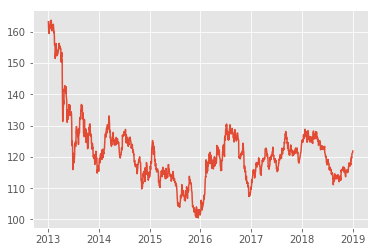

In [9]:
with plt.style.context('ggplot'):
    plt.plot(gld.Close)

In [13]:
gld.index = pd.DatetimeIndex(gld.index)
monthly = gld.resample('BM').last()
monthly.head()

,High,Low,Open,Close,Volume
Date,,,,,
2013-01-31,161.81,160.47,161.62,161.20,9334000
2013-02-28,154.16,152.39,154.09,153.00,14864400
2013-03-29,154.80,154.22,154.50,154.45,6851200
2013-04-30,142.83,141.55,142.27,142.77,11284400
2013-05-31,136.05,133.89,135.71,133.92,9726600


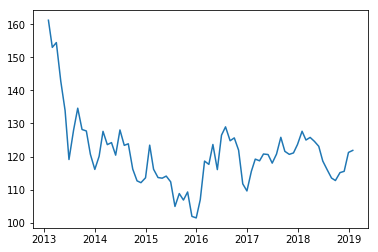

In [15]:
plt.plot(monthly['Close'])

In [16]:
gld['Change'] = gld['Close'] -gld['Close'].shift()
gld.head()

,High,Low,Open,Close,Volume,Change
Date,,,,,,
2013-01-02,164.14,163.14,163.49,163.17,10431800,NaN
2013-01-03,162.88,160.83,162.48,161.20,16117500,-1.97
2013-01-04,160.63,158.89,159.52,160.44,19179800,-0.76
2013-01-07,159.96,159.15,159.36,159.43,9361800,-1.01
2013-01-08,160.99,160.01,160.46,160.56,7694800,1.13


In [17]:
gld['LN_change'] = np.log(gld['Close']/ gld['Close'].shift())
gld.head()

,High,Low,Open,Close,Volume,Change,LN_change
Date,,,,,,,
2013-01-02,164.14,163.14,163.49,163.17,10431800,NaN,NaN
2013-01-03,162.88,160.83,162.48,161.20,16117500,-1.97,-0.012147
2013-01-04,160.63,158.89,159.52,160.44,19179800,-0.76,-0.004726
2013-01-07,159.96,159.15,159.36,159.43,9361800,-1.01,-0.006315
2013-01-08,160.99,160.01,160.46,160.56,7694800,1.13,0.007063


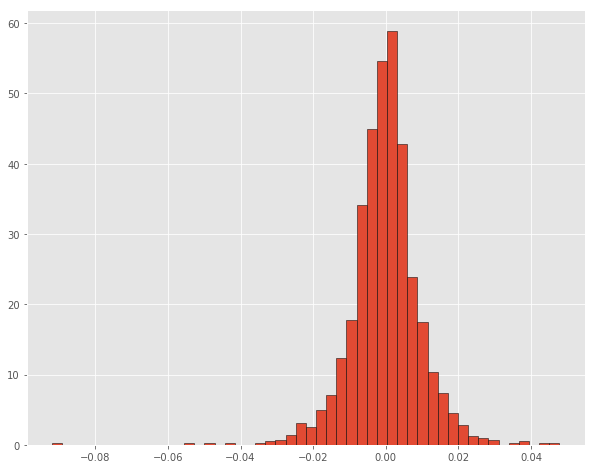

In [18]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10,8))
    plt.hist(gld.LN_change[1:],bins=50,edgecolor='black', density='True')

In [20]:
gld['Daily Vol'] = gld['LN_change'].rolling(21).std().shift()

In [22]:
gld['Exp Change'] = gld['Close'] * gld['Daily Vol']
gld.head(23)

,High,Low,Open,Close,Volume,Change,LN_change,Daily Vol,Exp Change
Date,,,,,,,,,
2013-01-02,164.14,163.14,163.49,163.17,10431800,NaN,NaN,NaN,NaN
2013-01-03,162.88,160.83,162.48,161.20,16117500,-1.97,-0.012147,NaN,NaN
2013-01-04,160.63,158.89,159.52,160.44,19179800,-0.76,-0.004726,NaN,NaN
2013-01-07,159.96,159.15,159.36,159.43,9361800,-1.01,-0.006315,NaN,NaN
2013-01-08,160.99,160.01,160.46,160.56,7694800,1.13,0.007063,NaN,NaN
2013-01-09,160.83,159.90,160.77,160.49,8334200,-0.07,-0.000436,NaN,NaN
2013-01-10,162.56,161.61,161.61,161.98,11432600,1.49,0.009241,NaN,NaN
2013-01-11,161.90,160.11,161.86,161.06,13675600,-0.92,-0.005696,NaN,NaN
2013-01-14,161.97,161.13,161.88,161.54,7289000,0.48,0.002976,NaN,NaN


In [23]:
gld = gld[22:]
gld.head()

,High,Low,Open,Close,Volume,Change,LN_change,Daily Vol,Exp Change
Date,,,,,,,,,
2013-02-04,162.42,161.15,161.19,162.00,7354900,0.55,0.003401,0.006026,0.976143
2013-02-05,162.79,161.33,162.75,161.96,8979400,-0.04,-0.000247,0.005451,0.882908
2013-02-06,162.63,161.99,162.13,162.39,6138700,0.43,0.002651,0.005334,0.866176
2013-02-07,162.96,161.13,161.24,161.84,12827200,-0.55,-0.003393,0.005120,0.828617
2013-02-08,162.02,161.20,161.46,161.57,6085900,-0.27,-0.001670,0.004995,0.807061
